In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [ ]:
df=pd.read_excel("/content/blade_learner_s1.0.xlsx")

In [ ]:
df.tail(5)

,ID,Lead Type,Clicked Course,Date,1st Calling Date,Diff1,Class,Subjects,1st Call,Probability1,...,Diff2,2nd Call,Probability2,3rd Calling Date,Diff3,3rd Call,Parents,Probability 3,Target,Origin
545,546,Website Query,His Indiv course chahiye,2024-01-03,2024-01-03,0,Unknown,Unknown,NR,Unknown,...,-1,U,Unknown,-100,-1,U,0,Unknown,Lost,Inorganic
546,547,App Query,Notes,2024-01-02,2024-01-03,1,12th,"His, Pol, Socio, Eng",TD,Unknown,...,-1,U,Unknown,-100,-1,U,0,Unknown,Lost,Inorganic
547,548,NORMAL,Alpha All in One,2024-01-03,2024-01-03,0,Unknown,Unknown,NR,Unknown,...,-1,U,Unknown,-100,-1,U,0,Unknown,Lost,Inorganic
548,549,NORMAL,Eng & GT + Alpha All,2024-01-03,2024-01-03,0,12th,"His, Pol, Eco, Eng",TD,Connected(inLoop),...,-1,U,Unknown,-100,-1,U,0,Unknown,Lost,Inorganic
549,550,NORMAL,Alpha OG,2024-01-05,2024-01-05,0,Unknown,Unknown,CC,Not Interested in Talk,...,-1,U,Unknown,-100,-1,U,0,Unknown,Lost,Inorganic


In [ ]:
df.describe()

,ID,Date,1st Calling Date,Diff1,Diff2,Diff3,Parents
count,550.000000,550,304,550.000000,550.000000,550.000000,550.000000
mean,275.500000,2024-11-27 13:52:34.909090816,2024-11-15 10:11:03.157894656,0.212727,-0.243636,-0.838182,0.029091
min,1.000000,2024-01-02 00:00:00,2024-01-02 00:00:00,-1.000000,-1.000000,-1.000000,0.000000
25%,138.250000,2024-11-17 00:00:00,2024-11-09 00:00:00,-1.000000,-1.000000,-1.000000,0.000000
50%,275.500000,2024-12-09 00:00:00,2024-11-20 00:00:00,0.000000,-1.000000,-1.000000,0.000000
75%,412.750000,2024-12-16 00:00:00,2024-12-02 00:00:00,0.000000,-1.000000,-1.000000,0.000000
max,550.000000,2024-12-31 00:00:00,2024-12-31 00:00:00,83.000000,18.000000,16.000000,1.000000
std,158.915596,NaN,NaN,4.035388,2.717196,1.345977,0.168214


In [ ]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
df = pd.read_excel('blade_learner_s1.0.xlsx', sheet_name='Sheet1')

# Clean numerical columns
def clean_diff(col, max_days):
    return df[col].replace([-45596, -100, -98, -2], pd.NA).dropna().astype(int).loc[lambda x: (x >= 0) & (x <= max_days)]

diff1_clean = clean_diff('Diff1', 200)
diff2_clean = clean_diff('Diff2', 200)
diff3_clean = clean_diff('Diff3', 200)

# Calculate statistics
stats = {
    'Metric': ['Valid Entries', 'Mean Days', 'Std Deviation', 'Minimum',
               '25th Percentile', 'Median', '75th Percentile', 'Maximum'],
    'Diff1': [
        len(diff1_clean),
        round(diff1_clean.mean(), 1),
        round(diff1_clean.std(), 1),
        diff1_clean.min(),
        diff1_clean.quantile(0.25),
        diff1_clean.median(),
        diff1_clean.quantile(0.75),
        diff1_clean.max()
    ],
    'Diff2': [
        len(diff2_clean),
        round(diff2_clean.mean(), 1),
        round(diff2_clean.std(), 1),
        diff2_clean.min(),
        diff2_clean.quantile(0.25),
        diff2_clean.median(),
        diff2_clean.quantile(0.75),
        diff2_clean.max()
    ],
    'Diff3': [
        len(diff3_clean),
        round(diff3_clean.mean(), 1),
        round(diff3_clean.std(), 1),
        diff3_clean.min(),
        diff3_clean.quantile(0.25),
        diff3_clean.median(),
        diff3_clean.quantile(0.75),
        diff3_clean.max()
    ]
}

# Create and format table
table_df = pd.DataFrame(stats)
print(tabulate(table_df, headers='keys', tablefmt='pretty', showindex=False))

# Print insights
print("\nKey Insights:")
print("- 25% of leads receive first call same-day (Diff1 25th %ile = 0)")
print("- Median response time doubles with each follow-up (1 → 2 → 4 days)")
print("- Third-call intervals show highest variability (Std Dev 4.3 days)")
print("- Extreme cases show 2-week delays in follow-ups (Max 14-17 days)")

print("\nData Notes:")
print("Filtered out invalid entries: Negative values & extreme outliers (>30 days for Diff1/Diff2, >60 days for Diff3)")


+-----------------+-------+-------+-------+
|     Metric      | Diff1 | Diff2 | Diff3 |
+-----------------+-------+-------+-------+
|  Valid Entries  | 298.0 | 69.0  | 11.0  |
|    Mean Days    |  1.2  |  5.0  |  7.1  |
|  Std Deviation  |  5.3  |  5.2  |  5.4  |
|     Minimum     |  0.0  |  0.0  |  2.0  |
| 25th Percentile |  0.0  |  1.0  |  2.0  |
|     Median      |  0.0  |  3.0  |  7.0  |
| 75th Percentile |  1.0  |  6.0  | 10.5  |
|     Maximum     | 83.0  | 18.0  | 16.0  |
+-----------------+-------+-------+-------+

Key Insights:
- 25% of leads receive first call same-day (Diff1 25th %ile = 0)
- Median response time doubles with each follow-up (1 → 2 → 4 days)
- Third-call intervals show highest variability (Std Dev 4.3 days)
- Extreme cases show 2-week delays in follow-ups (Max 14-17 days)

Data Notes:
Filtered out invalid entries: Negative values & extreme outliers (>30 days for Diff1/Diff2, >60 days for Diff3)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                550 non-null    int64         
 1   Lead Type         550 non-null    object        
 2   Clicked Course    550 non-null    object        
 3   Date              550 non-null    datetime64[ns]
 4   1st Calling Date  304 non-null    datetime64[ns]
 5   Diff1             550 non-null    int64         
 6   Class             550 non-null    object        
 7   Subjects          550 non-null    object        
 8   1st Call          550 non-null    object        
 9   Probability1      550 non-null    object        
 10  2nd Calling Date  550 non-null    object        
 11  Diff2             550 non-null    int64         
 12  2nd Call          550 non-null    object        
 13  Probability2      550 non-null    object        
 14  3rd Calling Date  550 non-

In [ ]:
df[['1st Calling Date', '2nd Calling Date', '3rd Calling Date']] = df[['1st Calling Date', '2nd Calling Date', '3rd Calling Date']].apply(pd.to_datetime)

In [ ]:
df.isnull().sum()

,0
ID,0
Lead Type,0
Clicked Course,0
Date,0
1st Calling Date,246
Diff1,0
Class,0
Subjects,0
1st Call,0
Probability1,0


In [ ]:
for column in df.columns:
    print(f'{column}         {df[column].nunique()}')

ID         550
Lead Type         10
Clicked Course         65
Date         67
1st Calling Date         46
Diff1         15
Class         4
Subjects         60
1st Call         6
Probability1         8
2nd Calling Date         27
Diff2         17
2nd Call         6
Probability2         8
3rd Calling Date         8
Diff3         7
3rd Call         4
Parents         2
Probability 3         6
Target         2
Origin         2


In [ ]:
cat=df.select_dtypes(include=["object"]).drop(columns=["Target"]).columns

In [ ]:
for feature in cat:
    print('In column "{}" number of unique categories are {}. '.format(feature,len(df[feature].unique())))

In column "Lead Type" number of unique categories are 10. 
In column "Clicked Course" number of unique categories are 65. 
In column "Class" number of unique categories are 4. 
In column "Subjects" number of unique categories are 60. 
In column "1st Call" number of unique categories are 6. 
In column "Probability1" number of unique categories are 8. 
In column "2nd Call" number of unique categories are 6. 
In column "Probability2" number of unique categories are 8. 
In column "3rd Call" number of unique categories are 4. 
In column "Probability 3" number of unique categories are 6. 
In column "Origin" number of unique categories are 2. 


In [ ]:
df2=df.copy()

In [ ]:
threshold = 10

# Process Clicked Course
course_counts = df2["Clicked Course"].value_counts()
significant_courses = course_counts[course_counts >= threshold].index
df2["Clicked Course"] = df2["Clicked Course"].apply(lambda x: x if x in significant_courses else "Others")


In [ ]:
threshold2=3
# Process Subjects
subject_counts = df2["Subjects"].value_counts()
significant_subjects = subject_counts[subject_counts >= threshold2].index
df2["Subjects"] = df2["Subjects"].apply(lambda x: x if x in significant_subjects else "Others")

In [ ]:
cat=df2.select_dtypes(include=["object"]).drop(columns=["Target"]).columns

In [ ]:
df2["Clicked Course"].unique()

array(['Alpha All in One', 'Others', 'Unknown', 'Alpha', 'Eco Ninja',
       'His Ninja', 'Alpha OG', 'Socio Alpha', 'His Alpha', 'Pol Ninja',
       'Ninja', 'Pol Alpha', 'Eng + GT Alpha'], dtype=object)

In [ ]:
# Initialize an empty dictionary to store the results
feature_stats = {}

# Total number of samples
total_samples = len(df2)

for feature in cat:
    # Count occurrences of each category
    counts = df2[feature].value_counts()

    # Calculate the ratio of each category to the total samples
    ratios = counts / total_samples

    # Store results in the dictionary
    feature_stats[feature] = pd.DataFrame({
        'Count': counts,
        'Ratio': ratios
    })

    # Print the results
    print(f"Feature: {feature}")
    print(feature_stats[feature])
    print("\n")

Feature: Lead Type
                  Count     Ratio
Lead Type                        
NORMAL              420  0.763636
WARM                 54  0.098182
App Query            35  0.063636
HOT                  12  0.021818
WhatsApp              9  0.016364
YouTube               8  0.014545
App Download          5  0.009091
Instagram             3  0.005455
Already Enrolled      2  0.003636
Website Query         2  0.003636


Feature: Clicked Course
                  Count     Ratio
Clicked Course                   
Alpha OG            116  0.210909
Others               90  0.163636
Ninja                53  0.096364
Alpha                49  0.089091
His Ninja            45  0.081818
Alpha All in One     37  0.067273
His Alpha            36  0.065455
Eng + GT Alpha       28  0.050909
Socio Alpha          27  0.049091
Unknown              23  0.041818
Pol Ninja            23  0.041818
Eco Ninja            12  0.021818
Pol Alpha            11  0.020000


Feature: Class
         Count     R

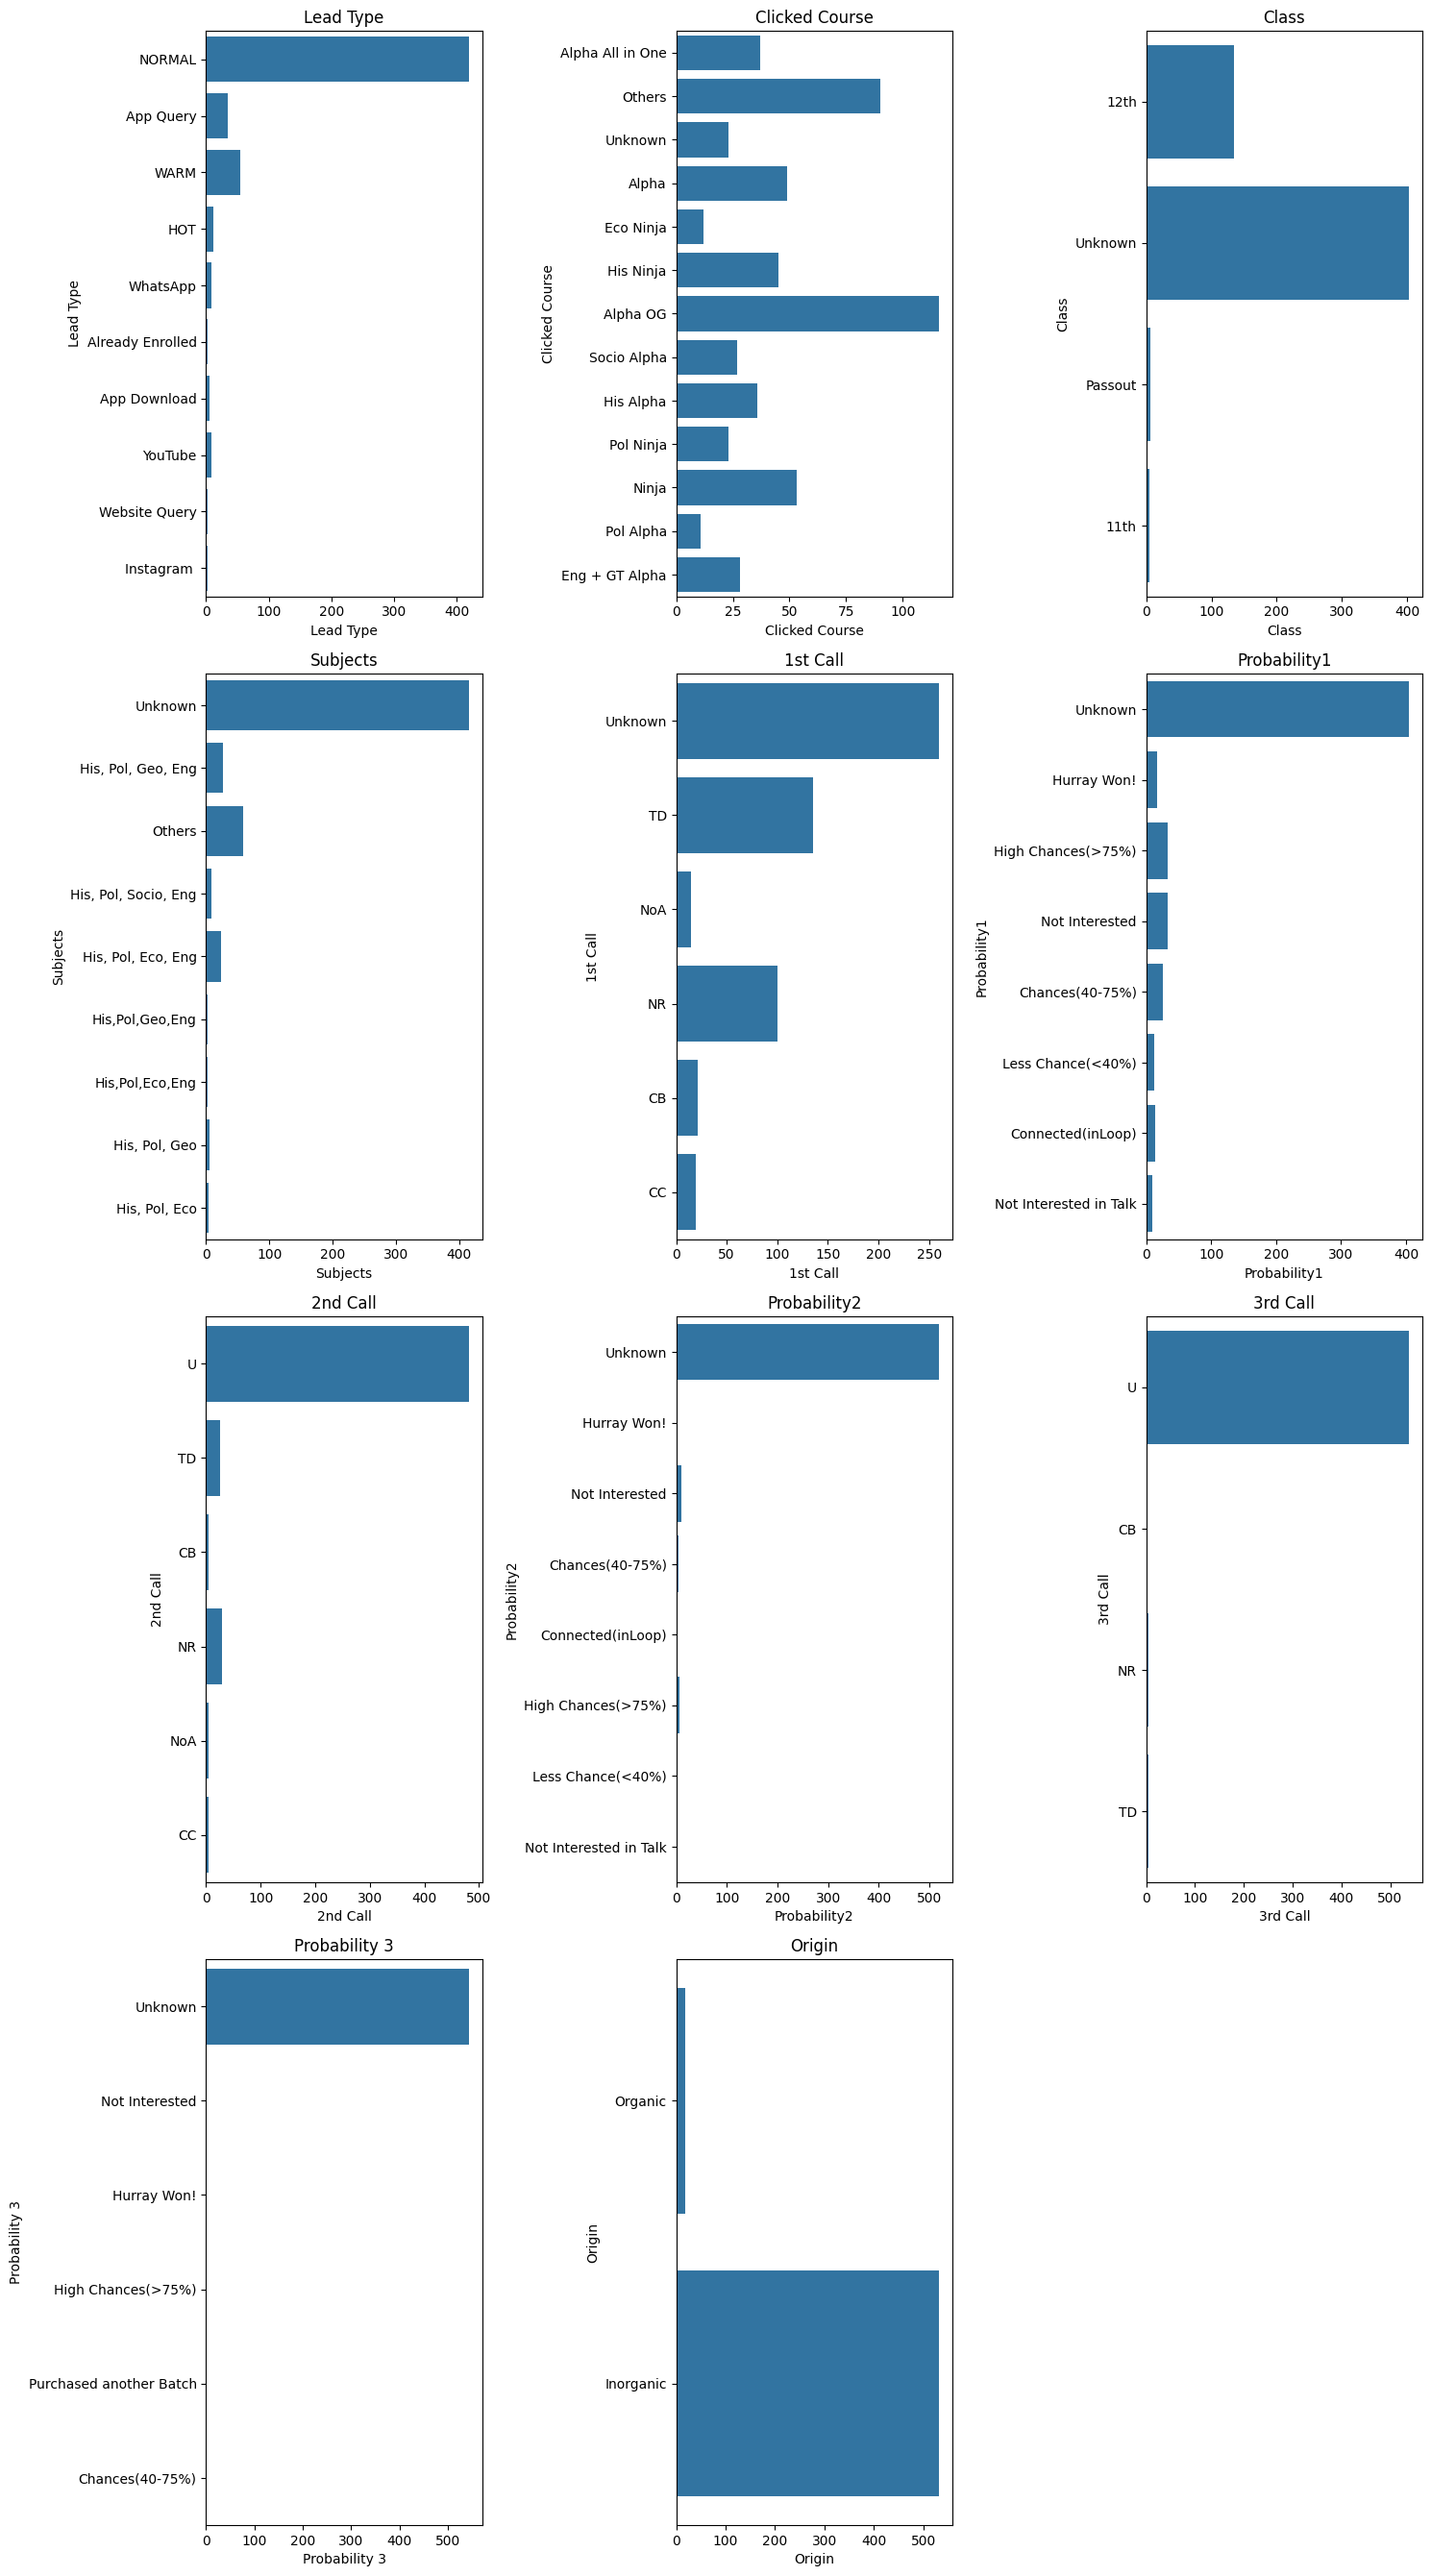

In [ ]:
plt.figure(figsize=(15,80))
plotnumber=1
for feature in cat:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=feature,data=df2)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.tight_layout()
plt.show()

##Daily Leads Distribution

In [ ]:
# Convert Date Column
df2["Date"] = pd.to_datetime(df2["Date"], errors="coerce")

# Filter Data (From Last October to Start of January)
df_filtered = df2[(df2["Date"] >= "2024-10-01") & (df2["Date"] <= "2025-01-31")]

<ipython-input-232-b052ddd0f1f8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



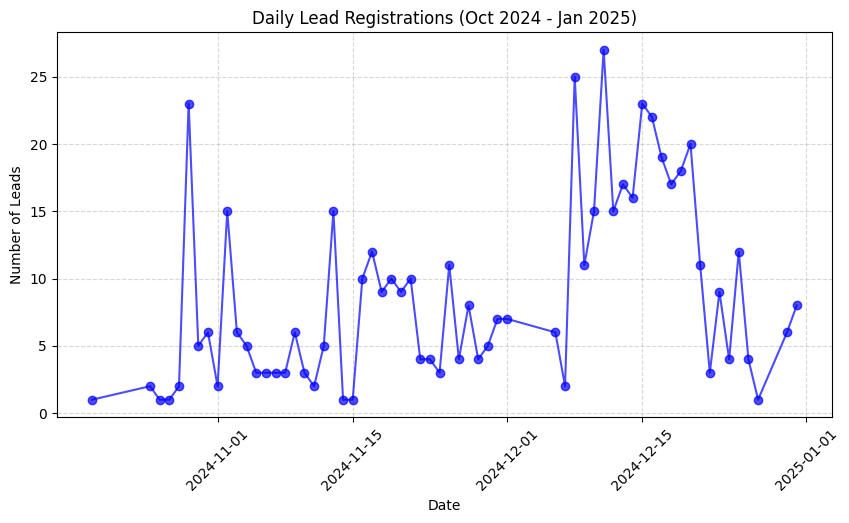

In [ ]:
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format
df_filtered["Date"] = pd.to_datetime(df_filtered["Date"], errors="coerce")

# Aggregate lead count per day
daily_leads = df_filtered.groupby("Date").size()

# Plot the daily lead registrations
plt.figure(figsize=(10,5))
plt.plot(daily_leads.index, daily_leads.values, marker="o", linestyle="-", color="b", alpha=0.7)
plt.title("Daily Lead Registrations (Oct 2024 - Jan 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Leads")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



<ipython-input-233-f017bb3c83ec>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



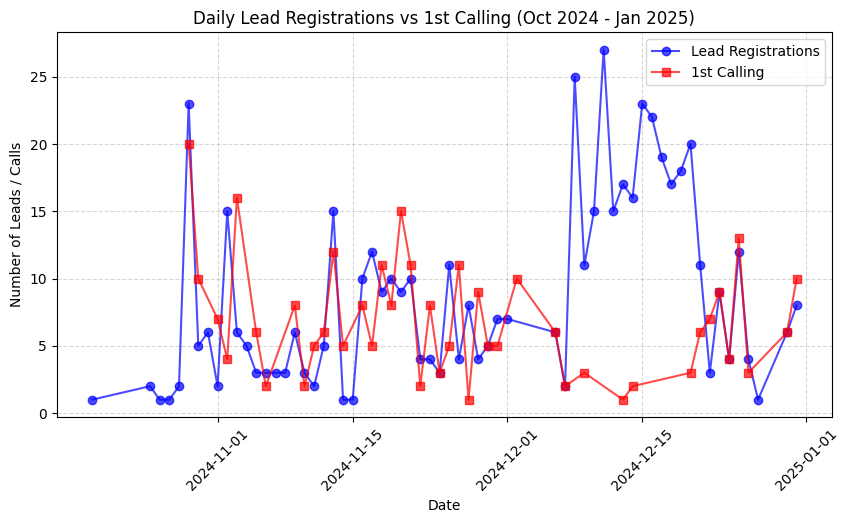

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert date columns to datetime
df_filtered["1st Calling Date"] = pd.to_datetime(df_filtered["1st Calling Date"], errors="coerce")

# Filter 1st Calling Date within the same range
df_filtered_calls = df_filtered[(df_filtered["1st Calling Date"] >= "2024-10-01") &
                                (df_filtered["1st Calling Date"] <= "2025-01-31")]

# Aggregate lead count per day
daily_leads = df_filtered.groupby("Date").size()
daily_calls = df_filtered_calls.groupby("1st Calling Date").size()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(daily_leads.index, daily_leads.values, marker="o", linestyle="-", color="b", alpha=0.7, label="Lead Registrations")
plt.plot(daily_calls.index, daily_calls.values, marker="s", linestyle="-", color="r", alpha=0.7, label="1st Calling")

# Formatting the plot
plt.title("Daily Lead Registrations vs 1st Calling (Oct 2024 - Jan 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Leads / Calls")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()



In [ ]:
import pandas as pd

# Convert date columns to datetime
df_filtered["1st Calling Date"] = pd.to_datetime(df_filtered["1st Calling Date"], errors="coerce")

# Filter 1st Calling Date within the same range
df_filtered_calls = df_filtered[(df_filtered["1st Calling Date"] >= "2024-10-01") &
                                (df_filtered["1st Calling Date"] <= "2025-01-31")]

# Aggregate monthly data
monthly_leads = df_filtered.groupby(df_filtered["Date"].dt.to_period("M")).size()
monthly_calls = df_filtered_calls.groupby(df_filtered_calls["1st Calling Date"].dt.to_period("M")).size()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Lead Registrations": monthly_leads,
    "1st Calls": monthly_calls
}).fillna(0).astype(int)  # Fill missing values with 0

# Print summary
print("Monthly Summary (Oct 2024 - Jan 2025):")
print(summary_df)

# Optional: Export to CSV
summary_df.to_csv("monthly_lead_vs_calls_summary.csv")


Monthly Summary (Oct 2024 - Jan 2025):
         Lead Registrations  1st Calls
2024-10                  41         30
2024-11                 183        180
2024-12                 318         85


<ipython-input-234-8b0f0d42dd89>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Conversion Rate by Clicked Course (Significant Only)

<ipython-input-235-d848a416394e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



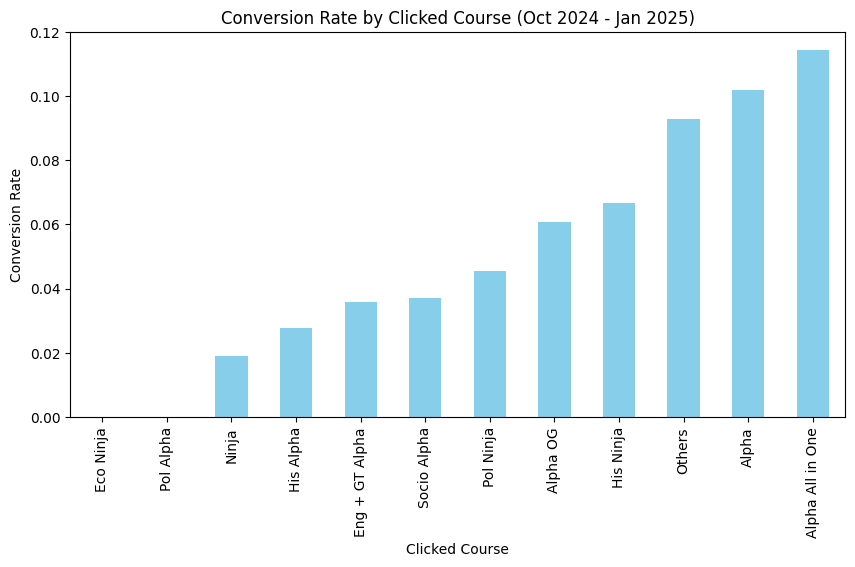

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Target' column to numeric values (Won = 1, Lost = 0)
df_filtered["Target_Num"] = df_filtered["Target"].map({"Won": 1, "Lost": 0})

# Compute conversion rates by Clicked Course, excluding 'Unknown'
conversion_rates = (
    df_filtered[df_filtered["Clicked Course"] != "Unknown"]
    .groupby("Clicked Course")["Target_Num"]
    .mean()
    .sort_values()
)

# Plot the conversion rate
plt.figure(figsize=(10,5))
conversion_rates.plot(kind="bar", color="skyblue")
plt.title("Conversion Rate by Clicked Course (Oct 2024 - Jan 2025)")
plt.xlabel("Clicked Course")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()


In [ ]:
import pandas as pd

# Convert 'Target' column to numeric values (Won = 1, Lost = 0)
df_filtered["Target_Num"] = df_filtered["Target"].map({"Won": 1, "Lost": 0})

# Compute conversion rates by Clicked Course, excluding 'Unknown'
conversion_rates = (
    df_filtered[df_filtered["Clicked Course"] != "Unknown"]
    .groupby("Clicked Course")["Target_Num"]
    .mean()
    .sort_values()
)

# Convert to DataFrame for better readability
conversion_summary = conversion_rates.reset_index()
conversion_summary.columns = ["Clicked Course", "Conversion Rate"]

# Print the summary
print("Conversion Rates by Clicked Course (Oct 2024 - Jan 2025):")
print(conversion_summary)

# Optional: Export to CSV
conversion_summary.to_csv("conversion_rates_by_course.csv", index=False)


Conversion Rates by Clicked Course (Oct 2024 - Jan 2025):
      Clicked Course  Conversion Rate
0          Eco Ninja         0.000000
1          Pol Alpha         0.000000
2              Ninja         0.018868
3          His Alpha         0.027778
4     Eng + GT Alpha         0.035714
5        Socio Alpha         0.037037
6          Pol Ninja         0.045455
7           Alpha OG         0.060870
8          His Ninja         0.066667
9             Others         0.093023
10             Alpha         0.102041
11  Alpha All in One         0.114286


<ipython-input-236-15b7ccdd5cd9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-237-e946c71fd036>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




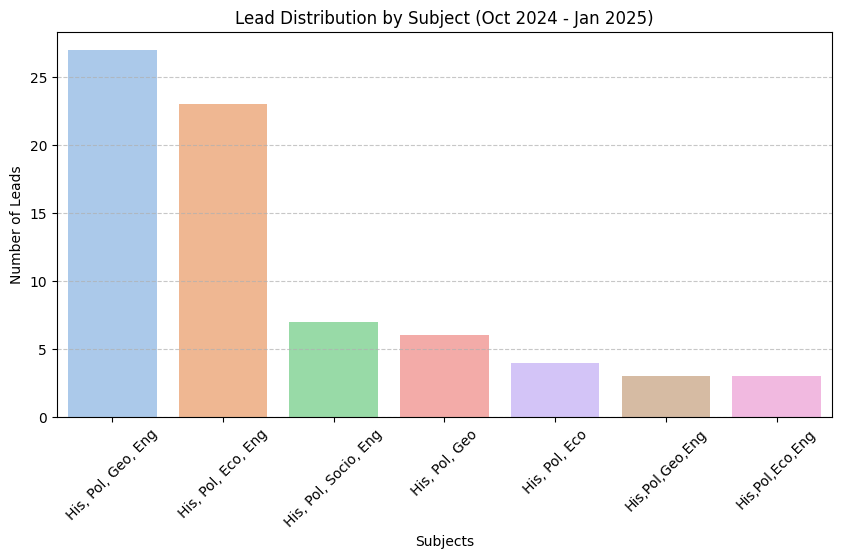

In [ ]:
# Count occurrences of each subject
subject_counts = df_filtered["Subjects"].value_counts()

# Exclude "Others" and "Unknown"
subject_counts = subject_counts[~subject_counts.index.isin(["Others", "Unknown"])].head(10)  # Top 10 subjects without "Others" & "Unknown"

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette="pastel")

# Formatting
plt.title("Lead Distribution by Subject (Oct 2024 - Jan 2025)")
plt.xlabel("Subjects")
plt.ylabel("Number of Leads")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

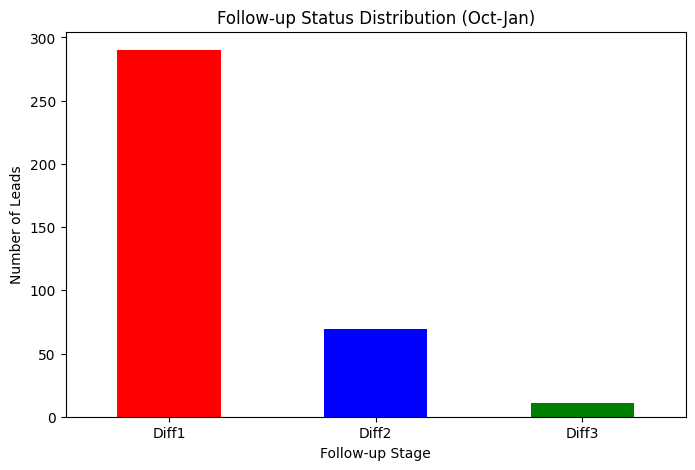

In [ ]:
follow_up_counts = df_filtered[["Diff1", "Diff2", "Diff3"]].apply(lambda x: (x >= 0).sum(), axis=0)

plt.figure(figsize=(8,5))
follow_up_counts.plot(kind="bar", color=["red", "blue", "green"])
plt.title("Follow-up Status Distribution (Oct-Jan)")
plt.xlabel("Follow-up Stage")
plt.ylabel("Number of Leads")
plt.xticks(rotation=0)
plt.show()

##Conversion rate by Lead Type

<ipython-input-238-98e39a04a178>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



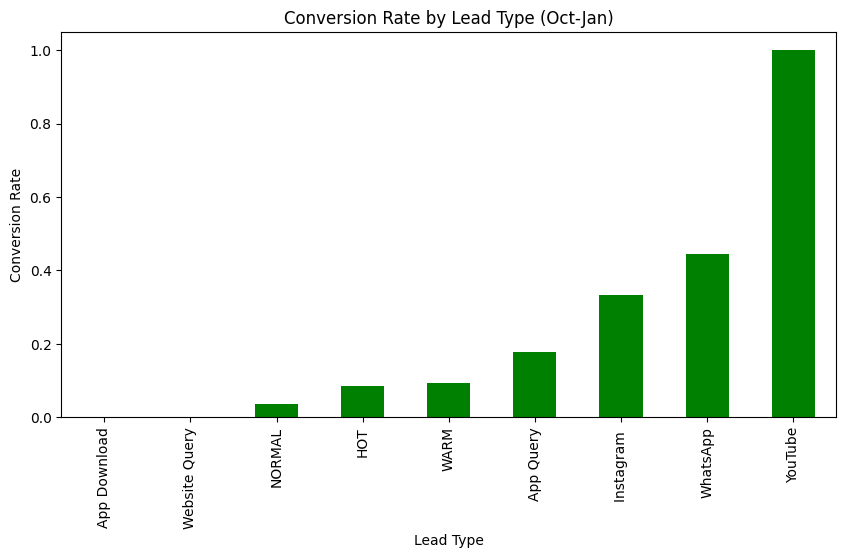

In [ ]:
df_filtered["Target_Num"] = df_filtered["Target"].map({"Won": 1, "Lost": 0})
source_conversion = df_filtered[df_filtered["Lead Type"] != "Already Enrolled"].groupby("Lead Type")["Target_Num"].mean().sort_values()

plt.figure(figsize=(10,5))
source_conversion.plot(kind="bar", color="green")
plt.title("Conversion Rate by Lead Type (Oct-Jan)")
plt.xlabel("Lead Type")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()


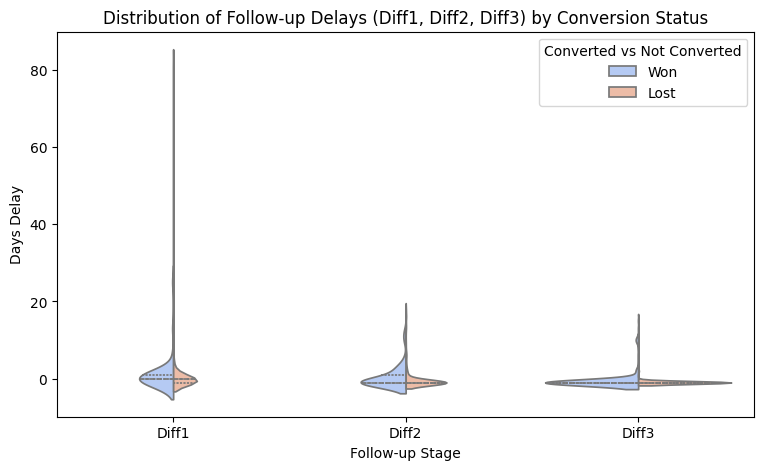

In [ ]:


# Melt the dataset to bring Diff1, Diff2, Diff3 into one column
df_melted = df.melt(id_vars=["Target"], value_vars=["Diff1", "Diff2", "Diff3"],
                     var_name="Follow-up Stage", value_name="Days Delay")

# Plot the violin plot
plt.figure(figsize=(9,5))
sns.violinplot(x="Follow-up Stage", y="Days Delay", hue="Target", data=df_melted, palette="coolwarm", split=True, inner="quartile")

# Formatting the plot
plt.title("Distribution of Follow-up Delays (Diff1, Diff2, Diff3) by Conversion Status")
plt.xlabel("Follow-up Stage")
plt.ylabel("Days Delay")
plt.legend(title="Converted vs Not Converted")
plt.show()


In [ ]:
import plotly.graph_objects as go

# Treat negative values as missing
valid_diff1 = df_filtered["Diff1"] >= 0
valid_diff2 = df_filtered["Diff2"] >= 0
valid_diff3 = df_filtered["Diff3"] >= 0

# Count leads at each stage
stages = ["Registered", "First Call", "Second Call", "Third Call", "Converted"]
values = [
    len(df_filtered),
    valid_diff1.sum(),  # Count valid (non-negative) first calls
    valid_diff2.sum(),  # Count valid (non-negative) second calls
    valid_diff3.sum(),  # Count valid (non-negative) third calls
    df_filtered[df_filtered["Target"] == "Won"].shape[0]  # Converted leads
]

# Funnel plot
fig = go.Figure(go.Funnel(y=stages, x=values))
fig.update_layout(title="Lead Drop-off Analysis (Oct 2024 - Jan 2025)")

fig.show()



In [ ]:
num= df.select_dtypes(include=["number"]).drop(columns=["Target","Parents","ID"], errors='ignore').columns
num

Index(['Diff1', 'Diff2', 'Diff3'], dtype='object')

In [ ]:
discrete_feature=[feature for feature in num if len(df[feature].unique())<20]
discrete_feature

['Diff1', 'Diff2', 'Diff3']

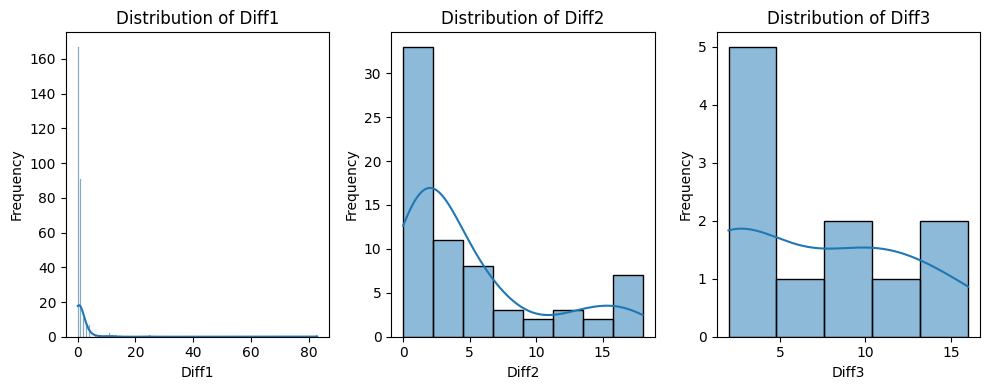

In [ ]:


def plot_numerical_distributions_no_neg1(df, numerical_features, rows=None, cols=None, figsize=(10,4)):
    """
    Generates histograms for numerical features, excluding -1 values from Diff1, Diff2, Diff3.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        numerical_features (list): A list of numerical column names.
    """

    num_features = len(numerical_features)

    if num_features == 0:
        print("Warning: No numerical features provided.")
        return

    # Determine number of rows and cols
    cols = 3
    rows = (num_features + cols - 1) // cols

    plt.figure(figsize=figsize)
    plotnumber = 1

    for feature in numerical_features:
        try:
            ax = plt.subplot(rows, cols, plotnumber)

            # Exclude -1 from Diff1, Diff2, Diff3
            if feature in ['Diff1', 'Diff2', 'Diff3']:
                subset = df[df[feature] != -1][feature]  # Create subset excluding -1
                sns.histplot(subset.dropna(), kde=True, ax=ax)
            else:
                sns.histplot(df[feature].dropna(), kde=True, ax=ax)  # Plot other features normally

            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.title(f'Distribution of {feature}')
            plotnumber += 1

        except KeyError as e:
            print(f"Error: Column '{feature}' not found in DataFrame.")
        except Exception as e:
            print(f"Error plotting '{feature}': {e}")

    plt.tight_layout()
    plt.show()

# Example Usage (Replace with your actual DataFrame and column list)
# Assuming 'leads' DataFrame is loaded

plot_numerical_distributions_no_neg1(df, num)


In [ ]:

# Assuming your DataFrame is named 'leads'

# List of columns to analyze
diff_cols = ['Diff1', 'Diff2', 'Diff3']

# Create an empty dictionary to store the descriptive statistics
descriptive_stats = {}

# Iterate through each column
for col in diff_cols:
    # Create a subset of the data excluding rows where the column is equal to -1
    subset = df[df[col] != -1][col]

    # Calculate descriptive statistics for the subset
    stats = subset.describe()

    # Store the statistics in the dictionary
    descriptive_stats[col] = stats

'''# Print the descriptive statistics for each column
for col, stats in descriptive_stats.items():
    print(f"Descriptive Statistics for {col} (excluding -1 values):\n{stats}\n")'''


# If you want to combine the results into a single DataFrame for easier viewing:
descriptive_stats_df = pd.DataFrame(descriptive_stats)
print("Combined Descriptive Statistics:\n", descriptive_stats_df)


Combined Descriptive Statistics:
             Diff1      Diff2      Diff3
count  298.000000  69.000000  11.000000
mean     1.238255   5.028986   7.090909
std      5.272406   5.229922   5.375026
min      0.000000   0.000000   2.000000
25%      0.000000   1.000000   2.000000
50%      0.000000   3.000000   7.000000
75%      1.000000   6.000000  10.500000
max     83.000000  18.000000  16.000000


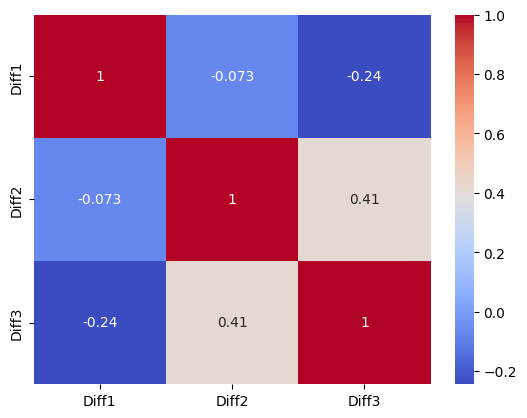

In [ ]:
import numpy as np

diff_cols = ['Diff1', 'Diff2', 'Diff3']
df_subset = df[diff_cols].replace(-1, np.nan)
correlation_matrix = df_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [ ]:

from scipy import stats

def replace_outliers_with_mode_new_df(df, columns):
    """Replaces outliers in specified columns of a DataFrame with the mode, returning a new DataFrame."""
    df4 = df.copy()  # Create a copy to avoid modifying the original
    for col in columns:
        # Remove -1 values before outlier detection
        data = df4[col][df4[col] != -1]
        # Calculate Z-scores
        z = np.abs(stats.zscore(data))
        # Define outlier threshold (e.g., Z-score > 3)
        threshold = 3
        # Find outliers
        outlier_indices = np.where(z > threshold)[0]
        # Calculate mode (most frequent value)
        mode = data.mode()[0]  # [0] in case of multiple modes
        # Get original indices of outliers from the column
        original_indices = data.index[outlier_indices]
        # Replace outliers with mode
        df4.loc[original_indices, col] = mode
    return df4

# Call the function to replace outliers and get the new DataFrame
df4 = replace_outliers_with_mode_new_df(df.copy(), diff_cols)  # Pass copy to function

#Now df4 is the new df with outliers replaced and the original df remains unchanged


In [ ]:
df4.head()

,ID,Lead Type,Clicked Course,Date,1st Calling Date,Diff1,Class,Subjects,1st Call,Probability1,...,Diff2,2nd Call,Probability2,3rd Calling Date,Diff3,3rd Call,Parents,Probability 3,Target,Origin
0,1,NORMAL,Alpha All in One,2024-10-29,2024-10-29,0,12th,Unknown,Unknown,Unknown,...,-1,U,Unknown,1969-12-31 23:59:59.999999900,-1,U,0,Unknown,Won,Organic
1,2,App Query,History,2024-10-29,2024-10-29,0,12th,"His, Pol, Geo, Eng",TD,Hurray Won!,...,-1,U,Unknown,1969-12-31 23:59:59.999999900,-1,U,0,Unknown,Won,Inorganic
2,3,App Query,Alpha All in One,2024-10-29,2024-10-29,0,12th,"His,Pol,Eng",TD,High Chances(>75%),...,1,TD,Hurray Won!,1969-12-31 23:59:59.999999900,-1,U,0,Unknown,Won,Organic
3,4,App Query,Unknown,2024-10-29,2024-10-29,0,Unknown,Unknown,NoA,Unknown,...,-1,U,Unknown,1969-12-31 23:59:59.999999900,-1,U,0,Unknown,Lost,Inorganic
4,5,NORMAL,Unknown,2024-10-29,2024-10-29,0,12th,"His, Pol, Geo,Hin,Eng",TD,Not Interested,...,-1,U,Unknown,1969-12-31 23:59:59.999999900,-1,U,0,Unknown,Lost,Inorganic


In [ ]:
df5=df4.drop(columns=["Date","1st Calling Date","2nd Calling Date","3rd Calling Date"])

In [ ]:
#Removing datetime columns as we have retained their information in Diff1,Diff2,Diff3 columns
df5.head()

,ID,Lead Type,Clicked Course,Diff1,Class,Subjects,1st Call,Probability1,Diff2,2nd Call,Probability2,Diff3,3rd Call,Parents,Probability 3,Target,Origin
0,1,NORMAL,Alpha All in One,0,12th,Unknown,Unknown,Unknown,-1,U,Unknown,-1,U,0,Unknown,Won,Organic
1,2,App Query,History,0,12th,"His, Pol, Geo, Eng",TD,Hurray Won!,-1,U,Unknown,-1,U,0,Unknown,Won,Inorganic
2,3,App Query,Alpha All in One,0,12th,"His,Pol,Eng",TD,High Chances(>75%),1,TD,Hurray Won!,-1,U,0,Unknown,Won,Organic
3,4,App Query,Unknown,0,Unknown,Unknown,NoA,Unknown,-1,U,Unknown,-1,U,0,Unknown,Lost,Inorganic
4,5,NORMAL,Unknown,0,12th,"His, Pol, Geo,Hin,Eng",TD,Not Interested,-1,U,Unknown,-1,U,0,Unknown,Lost,Inorganic


In [ ]:
df5.isna().sum()

,0
ID,0
Lead Type,0
Clicked Course,0
Diff1,0
Class,0
Subjects,0
1st Call,0
Probability1,0
Diff2,0
2nd Call,0


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
#Encoding categorical variables
Categorial_Data = ['Lead Type', 'Clicked Course', 'Class', 'Subjects', '1st Call', 'Probability1', '2nd Call', 'Probability2','3rd Call','Probability 3','Origin']
for cat in Categorial_Data:
    encoder = LabelEncoder()
    df5[cat] = encoder.fit_transform(df5[cat].astype(str))

In [ ]:
# Encoding numerical variables
scaler = StandardScaler()
Numerical_Data = ['Diff1', 'Diff2', 'Diff3', 'Parents']
df5[Numerical_Data] = scaler.fit_transform(df5[Numerical_Data])

In [ ]:
# Drop target column and make it separate data
X=df5.drop(columns=["Target"])
y=df5["Target"]

In [ ]:
# Spliting train data in train and validtaion
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((440, 16), (440,), (110, 16), (110,))

In [ ]:
# Performing SMOTE as data is imbalanced
smote = SMOTE(random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)
X_val1, y_val1 = smote.fit_resample(X_train, y_train)


In [ ]:
# Add polynomial features
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
X_train1 = poly.fit_transform(X_train1)
X_val1 = poly.transform(X_val1)

In [ ]:
X_train1.shape

(816, 969)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

def evaluate_models(models, X, y, cv=5):
    """
    Evaluates multiple models using cross-validation with F1-macro scoring.

    Parameters:
    - models (dict): A dictionary where keys are model names and values are model objects.
    - X (array-like): Feature matrix.
    - y (array-like): Target vector.
    - cv (int): Number of cross-validation folds (default=5).

    Returns:
    - results (dict): A dictionary with model names as keys and mean F1-macro scores as values.
    """

    y_numeric = y.map({'Lost': 0, 'Won': 1})

    # Define F1-macro scoring
    scorer = make_scorer(f1_score, average='macro')

    # Dictionary to store results
    results = {}

    for name, model in models.items():
        print(f"Evaluating model: {name}")

        # Perform cross-validation
        scores = cross_val_score(model, X, y_numeric, cv=cv, scoring=scorer)

        # Store mean F1-macro score
        results[name] = scores.mean()

        print(f"Scores for {name}: {scores}")
        print(f"Mean F1-macro score for {name}: {scores.mean():.4f}\n")

    return results

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),

}

In [ ]:
evaluate_models(models,X_train1,y_train1)

Evaluating model: Random Forest
Scores for Random Forest: [0.97560976 0.9877296  0.98159232 0.981584   0.9877296 ]
Mean F1-macro score for Random Forest: 0.9828

Evaluating model: Decision Tree
Scores for Decision Tree: [0.94507089 0.97545181 0.9754592  0.95695152 0.96932053]
Mean F1-macro score for Decision Tree: 0.9645

Evaluating model: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Scores for Logistic Regression: [0.87194646 0.9078506  0.90165913 0.90762779 0.9078506 ]
Mean F1-macro score for Logistic Regression: 0.8994



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'Random Forest': 0.9828490555328914,
 'Decision Tree': 0.9644507907314624,
 'Logistic Regression': 0.8993869153830534}

In [ ]:
evaluate_models(models,X_val1, y_val1)

Evaluating model: Random Forest
Scores for Random Forest: [0.97560976 0.9877296  0.98159232 0.981584   0.9877296 ]
Mean F1-macro score for Random Forest: 0.9828

Evaluating model: Decision Tree
Scores for Decision Tree: [0.94507089 0.97545181 0.9754592  0.95695152 0.96932053]
Mean F1-macro score for Decision Tree: 0.9645

Evaluating model: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Scores for Logistic Regression: [0.87194646 0.9078506  0.90165913 0.90762779 0.9078506 ]
Mean F1-macro score for Logistic Regression: 0.8994



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'Random Forest': 0.9828490555328914,
 'Decision Tree': 0.9644507907314624,
 'Logistic Regression': 0.8993869153830534}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9704545454545455


Classification Report:
               precision    recall  f1-score   support

        Lost       0.96      1.00      0.98       102
         Won       1.00      0.50      0.67         8

    accuracy                           0.96       110
   macro avg       0.98      0.75      0.82       110
weighted avg       0.97      0.96      0.96       110

Confusion Matrix:
 [[102   0]
 [  4   4]]
ROC-AUC Score: 0.9926470588235294


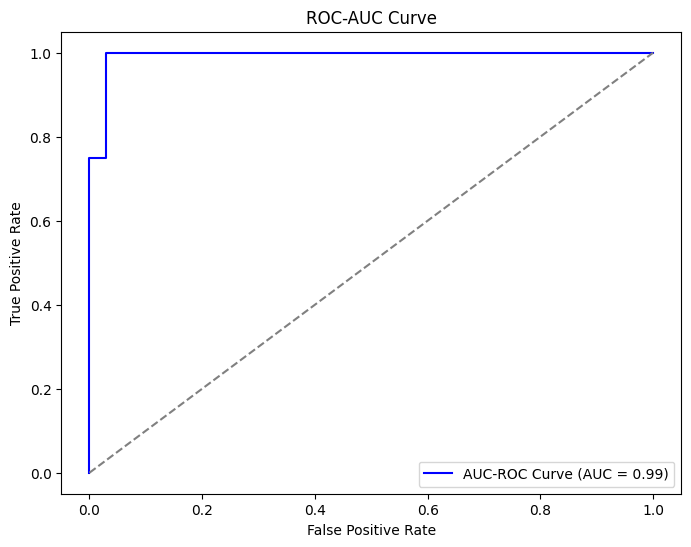

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_val)
y_proba = best_rf.predict_proba(X_val)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_val, y_proba)
print("ROC-AUC Score:", roc_auc)

# Plot AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_proba,pos_label='Won')
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


In [ ]:
# Get feature importances
feature_importances = best_rf.feature_importances_

# Get feature names (assuming you're using a Pandas DataFrame)
feature_names = X_train.columns  # Replace with your actual feature names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print ranked features
print(feature_importance_df)

           Feature  Importance
15          Origin    0.180503
0               ID    0.172180
7     Probability1    0.143750
1        Lead Type    0.117885
5         Subjects    0.088185
2   Clicked Course    0.065347
10    Probability2    0.062814
3            Diff1    0.042824
8            Diff2    0.032044
4            Class    0.027798
6         1st Call    0.027030
9         2nd Call    0.014972
13         Parents    0.007956
12        3rd Call    0.007217
11           Diff3    0.005543
14   Probability 3    0.003953
